# Get Down with Gradient Descent
> Get the intuition for gradient descent with a fresh analogy, develop the mathematical formulation, and implement it to train a linear regression model.
- toc: false
- badges: true
- comments: false
- hide: false
- image: images/gd_get_down.png

![](nb_images/gd_get_down.png "")

Ahh, gradient descent. It's probably one of the most ubiquitous algorithms used in data science, but you're unlikely to see it being celebrated in the limelight of the Kagle podium.  Rather than taking center stage, gradient descent operates under the hood, powering the training for a wide range of models including deep neural networks, gradient boosting trees, generalized linear models, mixed effects models, and even the humble linear regressor. Getting an intuition for the algorithm will reveal how model fitting actually works and help us to see the common thread connecting a wide range of seemingly unrelated models.  In this post we'll get the intuition for gradient descent with a *fresh* analogy, develop  the mathematical formulation, and ground our understanding by using it to train ourselves a linear regression model.

## Intuition

Gradient descent is a numerical optimization method that helps us find the inputs that yield the minimum value of a function. 
Since most explanations of this algorithm seem to use a story about hikers being lost in the mountains, we're going to try out a new analogy.

Let's say you're at a concert. Remember those? They're these things that used to happen where people played music and everyone danced and had a great time. Now suppose at this concert there's a dance floor which has become a bit sweltering from copious amounts of "getting down". But the temperature isn't quite uniform; maybe there's a cool spot from a ceiling fan somewhere. 

![](nb_images/gd_dance_floor.png "")

Let's get ourselves to that cool spot using the following procedure.

1. From our current position, figure out which direction feels coolest.
1. Take a step (with lots of swagger) in that direction.
1. Repeat steps 1 and 2 until we reach the coolest spot on the dance floor.

The crux of this procedure is figuring out, at each step,  which direction yields the greatest temperature reduction.
Our skin is pretty sensitive to temperature, so we can just use awareness of body sensation to sense which direction feels coolest.
Luckily, we have a mathematical equivalent to our skin's ability to sense local variation in temperature.


### Step 1: determine which way to go
Let $f(x,y)$ be the temperature on the dance floor at position $(x,y)$.
The direction of fastest decrease in temperature is going to be given by some vector in our $(x,y)$ space, e.g., 

[vector component in $x$ direction, vector component in $y$ direction]

Turns out that the gradient of a function evaluated at a particular location  yields a vector that points in the direction of fastest *increase* in the function, pretty similar to what we'relooking for.
The gradient of $f(x,y)$ is given by

$$ \nabla f(x,y) = \left [ \frac{\partial f(x,y)}{\partial x}, \frac{\partial f(x,y)}{\partial y} \right ] $$

The components of the gradient vector are the partial derivatives of our function $f(x,y)$, evaluated at the point $(x,y)$.
These partial derivatives just tell us the slope of $f(x,y)$ in the $x$ and $y$ directions respectively.
The intuition is that if $\frac{\partial f(x,y)}{\partial x}$ is a large positive number, then moving in the positive $x$ direction will make $f(x,y)$ increase a lot, whereas if $\frac{\partial f(x,y)}{\partial x}$ is a large negative number, then moving in the *negative* $x$ direction will make $f(x,y)$ increase a lot.

It's not too hard to see that the direction of fastest decrease is actually just the exact opposite direction from that of fastest increase.
Since we can point a vector in the opposite direction by negating its component values, our direction of fastest temperature decrease will be given by the negative gradient of the temperature field $-\nabla f(x,y)$.


![](nb_images/gd_local_change.png "")

### Step 2: take a step in the right direction
Now that we have our direction vector, we're ready to take a step toward the cool part of the dance floor. 
To do this, we'll just add our direction vector to our current position. The update rule would look like this.

$$ [x_\text{next}, y_\text{next}] = [x_\text{prev}, y_\text{prev}] - \nabla f (x_\text{prev}, y_\text{prev}) = [x_\text{prev}, y_\text{prev}] -  \left [ \frac{\partial f (x_\text{prev}, y_\text{prev})}{\partial x}, \frac{\partial f (x_\text{prev}, y_\text{prev})}{\partial y} \right ] $$ 

If we iteratively apply this update rule, we'll end up tracing a trajectory through the $(x,y)$ space on the dance floor and we'll eventually end up at the coolest spot!


![](nb_images/gd_trajectory.png "")

Great success!

## General Formulation

Let's generalize a bit to get to the form of gradient descent you'll see in references like [the wikipedia article](https://en.wikipedia.org/wiki/Gradient_descent).

First we modify our update equation above to handle functions with more than two arguments. We'll use a bold $\mathbf{x}$ to indicate a vector of inputs $\mathbf{x} = [x_1,x_2,\dots,x_p]$. Our function $f(\mathbf{x}): \mathbb{R}^p \mapsto \mathbb{R}$ maps a $p$ dimensional input to a scalar output.

Second, instead of displacing our current location with the negative gradient vector itself, we'll first rescale it with a learning rate parameter. This helps address any issues with units on inputs versus outputs. Imagine the input could range between 0 and 1, but the output ranged from 0 to 1,000. We would need to rescale the partial derivatives  so the update step doesn't send us way too far off in input space.

Finally, we'll index our updates with $t=0,1,\dots$. We'll run for some prespecified number of iterations or we'll stop the procedure once the change in $f(\mathbf{x})$ is sufficiently small from one iteration to the next. Our update equation will look like this.

$$\mathbf{x}_{t+1} = \mathbf{x}_t - \eta \nabla f ( \mathbf{x}_t) $$

In pseudocode we could write it like this.

```
# gradient descent
x = initial_value_of_x 
for t in range(n_iterations):  # or some other convergence condition
    x -= learning_rate * gradient_of_f(x)
```

Now let's see how this algorithm gets used to train models.

## Training a Linear Regression Model with Gradient Descent
To get the intuition for how we use gradient descent to train models, we'll use the hopefully familiar [ordinary least squares](https://en.wikipedia.org/wiki/Ordinary_least_squares) regression model, a.k.a. *linear regression*.
In this problem, we have numerical feature $x$ and numerical target $y$, and we want to find a model of the form

$$F(x) = \alpha + \beta x$$

This model has two parameters, $\alpha$ and $\beta$.
Here "training" means finding the parameter values that make $F(x)$ fit our $y$ data best. We measure how well, or really how poorly, our model fits the data by using a *loss function* that yields a small value when a model fits well. Ordinary least squares is so named because it uses mean squared error as its loss function.

$$L(y, F(x)) =  \frac{1}{n} \sum_{i=1}^{n} (y_i - F(x_i))^2  =  \frac{1}{n} \sum_{i=1}^{n} (y_i - (\alpha + \beta x_i))^2 $$

The loss function $L$ takes four arguments: $x$, $y$, $\alpha$, and $\beta$. But since $x$ and $y$ are fixed given our dataset, we could write the loss as $L(\alpha, \beta | x, y)$ to emphasize that $\alpha$ and $\beta$ are the only free parameters. So we're looking for the following.

$$\underset{\alpha,\beta}{\operatorname{argmin}} ~ L(\alpha,\beta|x,y) $$

That's right, we're looking for the values of $\alpha$ and $\beta$ that minimize scalar-valued function  $L(\alpha, \beta)$. Sounds familiar huh? 

To solve this minimization problem with gradient descent, we can use the following update rule.

$$[\alpha_{t+1}, \beta_{t+1}] = [\alpha_{t}, \beta_{t}] - \eta \nabla L(\alpha_t, \beta_t | x, y) $$

To get the gradient $\nabla L(\alpha,\beta|x,y)$, we need the partial derivatives of $L$ with respect to $\alpha$ and $\beta$. Since $L$ is just a big sum, it's easy to calculate the derivatives.

$$ \frac{\partial L(\alpha, \beta)}{\partial \alpha} = \frac{1}{n} \sum_{i=1}^{n} -2 (y_i - (\alpha + \beta x_i)) $$
$$ \frac{\partial L(\alpha, \beta)}{\partial \beta} = \frac{1}{n} \sum_{i=1}^{n} -2x_i (y_i - (\alpha + \beta x_i)) $$

Great! We've got everything we need to implement gradient descent to train an ordinary least squares model. Everything except data that is.

### Toy Data
Let's make a friendly little linear dataset where $\alpha=-10$ and $\beta=2$, i.e.

$$ y = -10 + 2x + \text{noise}$$

In [2]:
#hide
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
import numpy as np 

alpha_true, beta_true = -10, 2

rng = np.random.default_rng()
x = np.linspace(0, 10, 50)
y = alpha_true + beta_true*x + rng.normal(0, 1, size=x.shape)

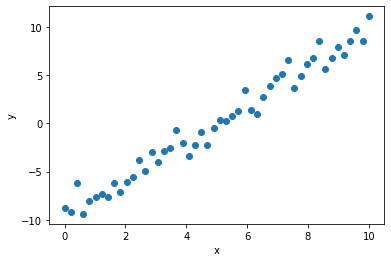

In [4]:
#hide_input
plt.scatter(x,y, label='y')
plt.xlabel('x')
plt.ylabel('y');
# plt.legend();

Our implementation will use a function to compute the gradient of the loss function. Since we have two parameters, we'll use length-2 arrays to hold their values and their partial derivatives. At each iteration, we update the parameter values by subtracting the rescaled partial derivatives. 

In [11]:
# linear regression using gradient descent 
def gradient_of_loss(parameters, x, y):
    alpha = parameters[0]
    beta = parameters[1]
    partial_alpha = np.mean(-2*(y - (alpha + beta*x)))
    partial_beta = np.mean(-2*x*(y - (alpha + beta*x)))
    return np.array([partial_alpha, partial_beta])

learning_rate = 0.02
parameters = np.array([0.0, 0.0]) # initial values of alpha and beta

for _ in range(500):
    partial_derivatives = gradient_of_loss(parameters, x, y)
    parameters -= learning_rate * partial_derivatives

We can see the loss function decreasing throughout the 500 iterations.

In [13]:
#hide
def loss(alpha, beta, x, y):
    return np.mean((y - (alpha + beta*x))**2)

def gradient_descent(alpha, beta, x, y, learning_rate):
    partial_derivative_alpha = np.mean(-2*(y - (alpha + beta*x)))
    partial_derivative_beta = np.mean(-2*x*(y - (alpha + beta*x)))
    alpha_next = alpha - learning_rate * partial_derivative_alpha
    beta_next = beta - learning_rate * partial_derivative_beta
    return alpha_next, beta_next

alphas = []
betas = []
losses = []
alpha, beta = 0.0, 0.0 # initial values of alpha and beta
for _ in range(500):
    losses.append(loss(alpha, beta, x, y))
    alphas.append(alpha)
    betas.append(beta)
    alpha, beta = gradient_descent(alpha, beta, x, y, learning_rate=0.02)

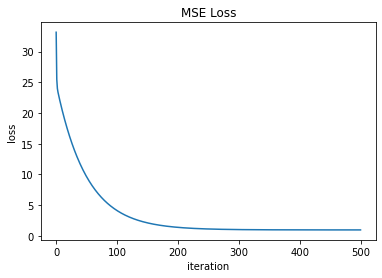

In [14]:
#hide_input
plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('MSE Loss');

And we can visualize the loss function as a contour plot over $(\alpha,\beta)$ space. 
The blue points show the trajectory our gradient descent followed as it shimmied from the initial position to the coolest spot in $(\alpha, \beta)$ space where the loss function is nice and small.

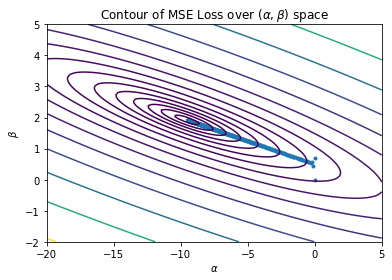

In [22]:
#hide_input
alpha_grid = np.linspace(-20, 5, 100)
beta_grid = np.linspace(-2, 5, 100)
loss_grid = np.zeros((len(alpha_grid), len(beta_grid)))

for i in range(len(alpha_grid)):
    for j in range(len(beta_grid)):
        loss_grid[j,i] = loss(alpha_grid[i], beta_grid[j], x, y)
        
plt.contour(alpha_grid, beta_grid, loss_grid, levels = np.logspace(-2,3,25))
# plt.contour(alpha_grid, beta_grid, loss_grid, levels = [1, 5, 10, 20, 30])
plt.xlabel('$\\alpha$'); plt.ylabel("$\\beta$")
plt.title('Contour of MSE Loss over $(\\alpha, \\beta)$ space');
# plt.scatter(alphas, betas, c=range(len(alphas)),  cmap='viridis', alpha=1, marker='.');
plt.scatter(alphas, betas, marker='.');
# plt.plot(alpha, beta, 'rv', markersize=8);

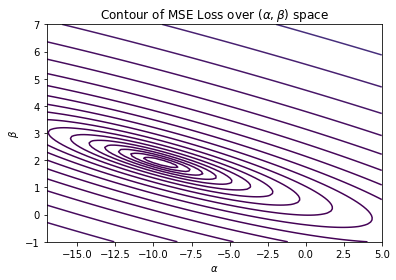

In [28]:
#hide_input
alpha_grid = np.linspace(-17, 5, 100)
beta_grid = np.linspace(-1, 7, 100)
loss_grid = np.zeros((len(alpha_grid), len(beta_grid)))

for i in range(len(alpha_grid)):
    for j in range(len(beta_grid)):
        loss_grid[j,i] = loss(alpha_grid[i], beta_grid[j], x, y)
        
plt.contour(alpha_grid, beta_grid, loss_grid, levels = np.logspace(-2,4,35))
# plt.contour(alpha_grid, beta_grid, loss_grid, levels = [1, 5, 10, 20, 30])
plt.xlabel('$\\alpha$'); plt.ylabel("$\\beta$")
plt.title('Contour of MSE Loss over $(\\alpha, \\beta)$ space');
# plt.scatter(alphas, betas, c=range(len(alphas)),  cmap='viridis', alpha=1, marker='.');
# plt.scatter(alphas, betas, marker='.');
# plt.plot(alpha, beta, 'rv', markersize=8);
plt.savefig('plot.png', dpi=300)

Our gradient descent settles in a spot pretty close to $(-10, 2)$ in $\alpha,\beta)$ space, which gives us the final fitted model below.

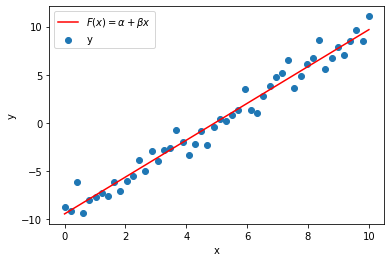

In [17]:
#hide_input
plt.scatter(x,y, label='y')
plt.plot([min(x), max(x)], [parameters[0] + parameters[1]*min(x), alpha + beta*max(x)], '-r', label='$F(x)=\\alpha+\\beta x$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

## Wrapping Up

There you have it, gradient descent explained with a fresh new analogy, plus an implemented example solving an ordinary least squares model.
While we often see gradient descent used to train models by performing an optimization in parameter space, as in linear regression and neural networks, there are other ways to use this powerful technique to train models. 
In particular, we'll soon see how our beloved gradient boosting tree models use gradient descent in prediction space, rather than parameter space to fit many datasets better than any other models out there.
Stay tuned for that mind bender in a future post.